В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [5]:
cars = pd.read_csv('cars.csv') 
cars.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [6]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

In [8]:
cars.shape

(100, 13)

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [10]:
cars.nunique()

Car_ID               100
Brand                 11
Model                 58
Year                   6
Kilometers_Driven     18
Fuel_Type              2
Transmission           2
Owner_Type             3
Mileage               15
Engine                36
Power                 40
Seats                  3
Price                 31
dtype: int64

Датафрейм складається з 13 змінних: 8 числових, і 5 категоріальних: 2 бінарні, 2 мультикатегоріальні без порядку і 1 мультикатегоріальна з порядком. У даних немає пропусків, все заповнено. Можливо б навіть можна було зробити колонки Car_ID і Year категоріальними. 

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [15]:
X = cars.drop(['Price', 'Car_ID'], axis=1) 
y = cars['Price']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [21]:
X_train['Fuel_Type'].value_counts(), X_train['Transmission'].value_counts()

(Petrol    41
 Diesel    39
 Name: Fuel_Type, dtype: int64,
 Automatic    49
 Manual       31
 Name: Transmission, dtype: int64)

In [26]:
Fuel_Type_codes = {'Diesel': 0, 'Petrol': 1}
X_train['Fuel_Type_codes'] = X_train.Fuel_Type.map(Fuel_Type_codes)
X_test['Fuel_Type_codes'] = X_test.Fuel_Type.map(Fuel_Type_codes)

In [27]:
Transmission_codes = {'Manual': 0, 'Automatic': 1}
X_train['Transmission_codes'] = X_train.Transmission.map(Transmission_codes)
X_test['Transmission_codes'] = X_test.Transmission.map(Transmission_codes)

In [29]:
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['Brand']])
enc.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [30]:
one_hot_train = enc.transform(X_train[['Brand']]).toarray()
one_hot_test = enc.transform(X_test[['Brand']]).toarray()

In [32]:
X_train[enc.categories_[0]] = one_hot_train
X_test[enc.categories_[0]] = one_hot_test

In [33]:
X_test.head()

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
17,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
92,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [37]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_codes,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_codes,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [47]:
X_train = X_train.select_dtypes(include=['number'])

In [48]:
train_full = pd.concat([X_train, y_train], axis=1)

In [49]:
corr_matrix = train_full.corr()

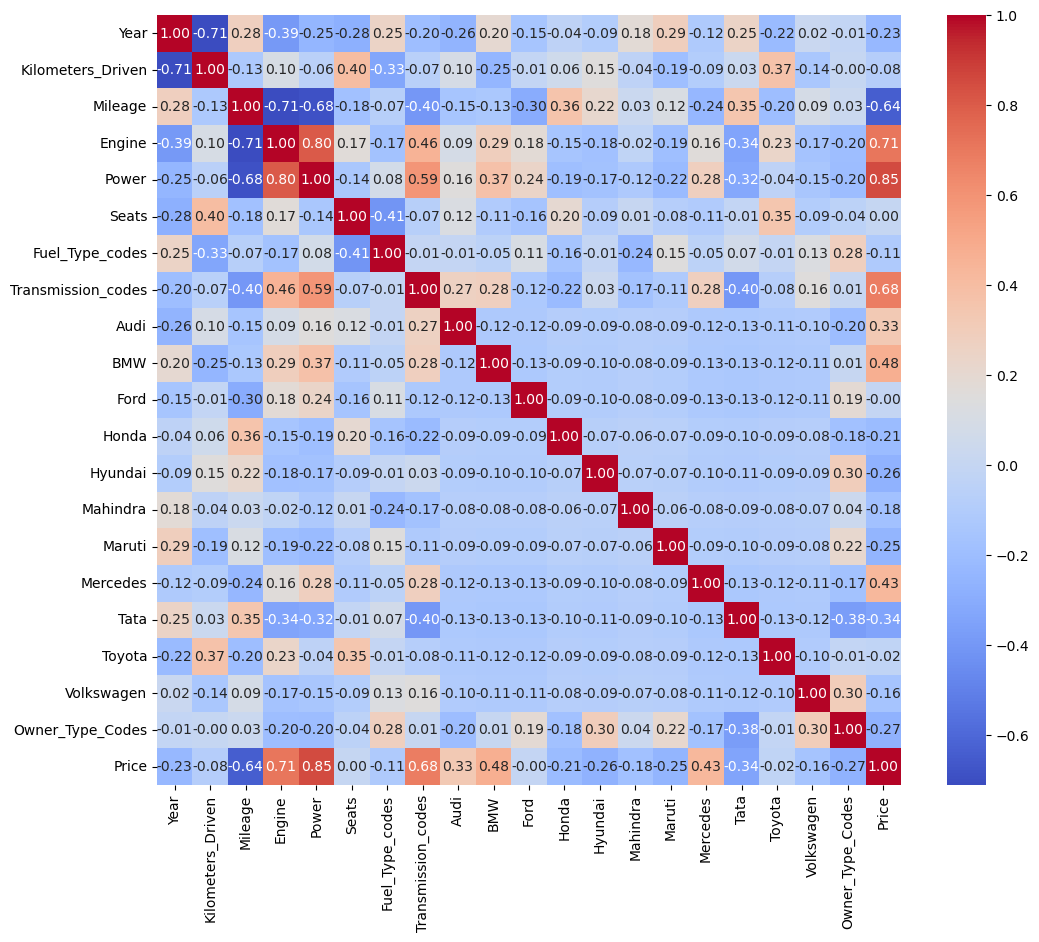

In [50]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Висока кореляція за модулем з цільовою змінною є у змінних Mileage, Engine, Power, Transmission_codes

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [73]:
X_test = X_test.select_dtypes(include=['number'])
X_test.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_codes,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,2016,38000,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,2019,26000,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,2020,18000,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,2019,26000,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [74]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [75]:
lin_reg.coef_, lin_reg.intercept_

(array([-1.03539595e+04, -1.08744370e+01, -3.86667124e+04, -3.75858737e+01,
         6.14075646e+03, -2.35301226e+03, -3.70607514e+05,  2.36367638e+05,
         7.58803045e+05,  7.30326849e+05, -3.05098169e+05, -1.89002506e+05,
        -5.05043272e+05, -5.74912608e+05, -3.94216231e+05,  7.33974724e+05,
        -1.26504171e+05,  1.30457503e+05, -2.58785164e+05,  6.62783066e+04]),
 22529791.832423583)

In [76]:
predictions_train = lin_reg.predict(X_train)
predictions_test = lin_reg.predict(X_test)

In [77]:
rmse = mean_squared_error(y_train, predictions_train, squared=False)
print(f"Root Mean Squared Error for train: {rmse:.2f}")

Root Mean Squared Error for train: 210342.80


In [78]:
rmse = mean_squared_error(y_test, predictions_test, squared=False)
print(f"Root Mean Squared Error for test: {rmse:.2f}")

Root Mean Squared Error for test: 259601.27


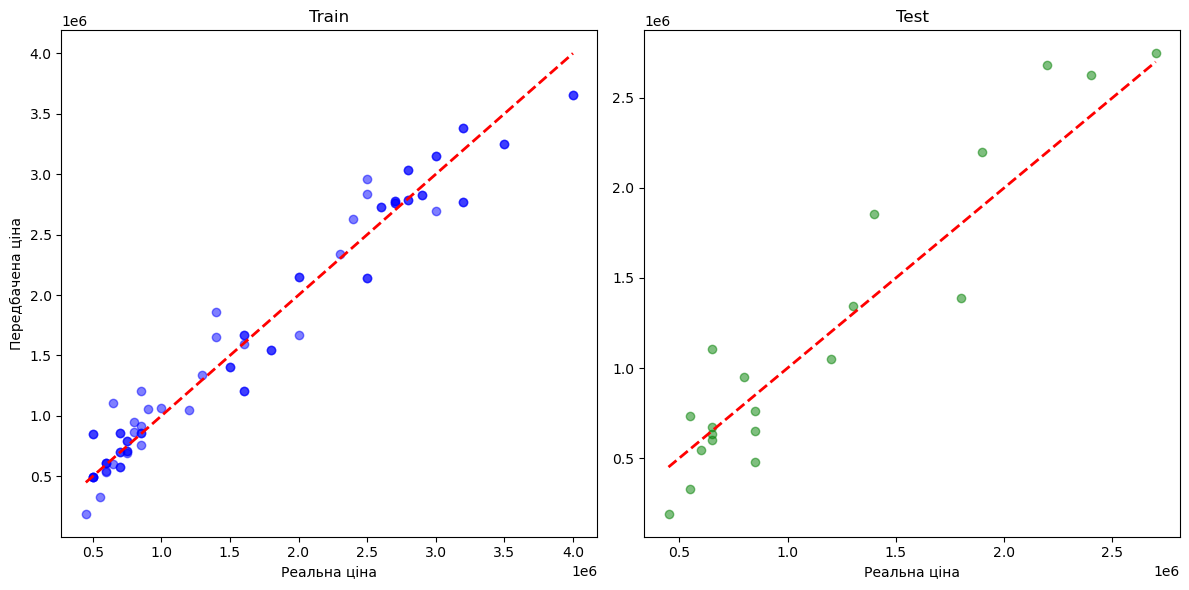

In [79]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, predictions_train, alpha=0.5, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.title("Train")
plt.xlabel("Реальна ціна")
plt.ylabel("Передбачена ціна")

# Тестові дані
plt.subplot(1, 2, 2)
plt.scatter(y_test, predictions_test, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Test")
plt.xlabel("Реальна ціна")

plt.tight_layout()
plt.show()

Я б сказала, що модель працює непогано, хоч звісно є відхилення, і у випадку з тестувальними даними відхилення дещо більші ніж у тренувальному, що в принципі очікувано.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [80]:
scaler = StandardScaler()

In [81]:
scaler.fit(X_train)

StandardScaler()

In [82]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
lin_reg_scaled = LinearRegression()
lin_reg_scaled.fit(X_train_scaled, y_train)

In [94]:
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model_scaled.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)
print(lin_reg_scaled.intercept_)

               Feature    Coefficient
4                Power  500000.506765
15            Mercedes  209257.737636
9                  BMW  208105.079738
8                 Audi  206123.092108
7   Transmission_codes  115153.439599
19    Owner_Type_Codes   43335.066079
17              Toyota   17619.429555
5                Seats   -1744.048812
0                 Year  -11604.260975
3               Engine  -24683.084080
11               Honda  -63112.339850
16                Tata  -65558.490423
18          Volkswagen  -93391.358093
1    Kilometers_Driven  -99713.958682
14              Maruti -112786.673613
10                Ford -119069.155830
2              Mileage -131884.633123
13            Mahindra -140931.632855
12             Hyundai -151916.052473
6      Fuel_Type_codes -185245.840763
1680000.0000000005


Із значеннями параметрами я в більшості згідна, де найвищі позитивні коефіцієнти відповідають потужності двигуна, дорожчим моделям автомобілів, автомат дорожче механіки, із кількістю власників не згідна, швидше на мою думку ціна мала б спадати із бішою кількістю власників, також коефіцієнт що відповідає року, очікувалося що чимостанніший рік, тим вища буде ціна, потім очікувано нижча ціна на дешевші марки автомобілів, на кілометраж, і спад ціни якщо авто на бензині.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [107]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [108]:
X_train_stat = sm.add_constant(X_train_scaled_df)

In [109]:
model_stat = sm.OLS(y_train.values, X_train_stat).fit()
print(model_stat.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     73.14
Date:                Sun, 01 Feb 2026   Prob (F-statistic):           2.34e-34
Time:                        20:33:43   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2228.
Df Residuals:                      60   BIC:                             2276.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   2.72

Ознаки які є статистично значущими: потужність, паливна ефективність, тип палива, автомат/механіка, ауді, бмв, форд, хондай, магіндра, маруті, мерс і фольцваген.

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [116]:
significant_features = ['Power', 'Mileage','Fuel_Type_codes', 'Transmission_codes', 'Audi', 'BMW', 'Ford', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Volkswagen']

In [117]:
X_train_sig = X_train_scaled_df[significant_features]
X_train_sig = sm.add_constant(X_train_sig)

In [118]:
model_sig = sm.OLS(y_train.values, X_train_sig).fit()
print(model_sig.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     109.4
Date:                Sun, 01 Feb 2026   Prob (F-statistic):           4.12e-39
Time:                        20:45:09   Log-Likelihood:                -1100.4
No. Observations:                  80   AIC:                             2227.
Df Residuals:                      67   BIC:                             2258.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   2.78

R2 і Adj. R-squared майже змінилися, хіба на пару тисячних зменшилися

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 8 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 8? Яку модель з останніх 3х завдань ви б лишили для використання?

In [120]:
better_features = ['Power', 'Kilometers_Driven', 'Mileage','Fuel_Type_codes', 'Transmission_codes', 'Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Tata', 'Maruti', 'Mercedes', 'Volkswagen']

In [121]:
X_train_bet = X_train_scaled_df[better_features]
X_train_bet = sm.add_constant(X_train_bet)

In [122]:
model_bet = sm.OLS(y_train.values, X_train_bet).fit()
print(model_bet.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     97.03
Date:                Sun, 01 Feb 2026   Prob (F-statistic):           4.85e-38
Time:                        20:47:43   Log-Likelihood:                -1094.7
No. Observations:                  80   AIC:                             2221.
Df Residuals:                      64   BIC:                             2260.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   2.65

значення точності моделі знову практично не змінилися, але тут виявився найбільший R-squared результат і лише на одну тисячну менший результат R2 ніж у цілого датасету. я б обрала оцей, останній